<h1><div align = "center"> Clasificador bayesiano ingenuo (Naive Bayes) </div></h1><br><br>
En términos simples, un clasificador de Bayes ingenuo asume que la presencia o ausencia de una característica particular no está relacionada con la presencia o ausencia de cualquier otra característica, dada la clase variable. Por ejemplo, una fruta puede ser considerada como una manzana si es roja, redonda y de alrededor de 7 cm de diámetro. Un clasificador de Bayes ingenuo considera que cada una de estas características contribuye de manera independiente a la probabilidad de que esta fruta sea una manzana, independientemente de la presencia o ausencia de las otras características [Wikipedia](https://es.wikipedia.org/wiki/Clasificador_bayesiano_ingenuo).

<h3>
<div align="center">
Teorema de Bayes original
</div>


<br><br>

$$ P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} $$
<br><br>

<div>
Dada una clase $C$ y un vector de características $F$ se define $P(C \mid F)$ :
</div>

<br><br>

$$ P(C \mid F_1, F_2, ... , F_n) = \frac{P(C) \ P(F_1 \mid C) \ P(F_2 \mid C) \  ... P(F_n \mid C)}{P(F_1, F_2, ... , F_n)} $$

<br><br>

<div align = "center">
$Se \ asume \  que \ cada \ característica \ F_i \ es \ independiente\  de\  cualquier \ otra\  F_j \ (asunción \ ingenua).$
</div>


<br><br><br>
<div>
Versión simplificada, en la practica no se necesita el denominador de la expresión:
</div>
<br>

$$ P(C \mid F_1, F_2, ... , F_n) = P(C) \ \prod_{i=1}^{n} P(F_i \mid C)$$

<br><br>

<div>
Función de densidad dada la clase $C$ y el atributo $F_i$ (distribución gaussiana):
</div>

<br><br>

$$ P(F_i \mid C) = \frac{1}{\sqrt[]{2\pi \sigma_{F_i} ^{2}}} \ \exp ^ {\left(- \frac{\left(F_i - \mu_{F_i} \right)^{2}}{2\sigma_{F_i}^{2}} \right)}$$

<br>

$$ Donde \ \sigma_{F_i}^{2}\ y \ \mu_{F_i} \ es \ la \ varianza \ y \ la \ media \ de \ F_i \ para \ la \ clase \ C. $$

<br><br><br>
<div>
La clasificación se realiza calculando la clase más probable:
</div>

<br><br>

$$ Clasificar(F_1,...,F_n) = \arg\max_C \left[ \ P(C \mid F_1, ..., F_n)\right] $$

</h3>

## Clasificando flores del [dataset iris](https://es.wikipedia.org/wiki/Iris_flor_conjunto_de_datos)

In [1]:
# Algebra lineal y funciones matemáticas
import numpy as np
# Manipulación de datos
import pandas as pd
# Gráficos
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Carga de datos, Exploración y Visualización

In [2]:
data = pd.read_csv('./input/Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


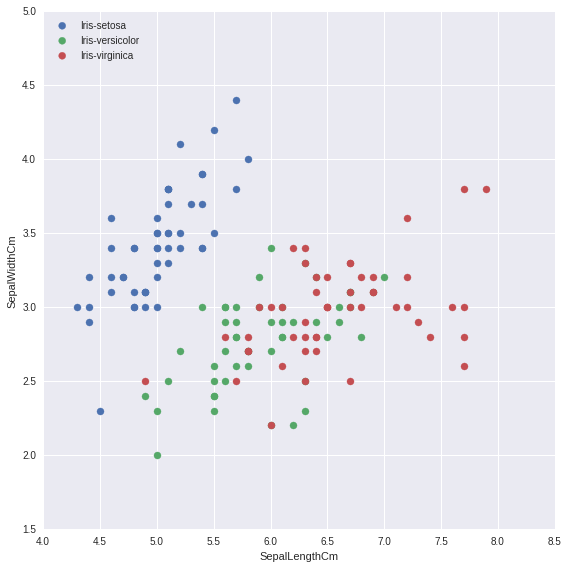

In [6]:
# Gráfico con respecto al sépalo de cada flor
sepalPlt = sb.FacetGrid(data, hue="Species", size=8) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm", s = 50)
plt.legend(loc='upper left');

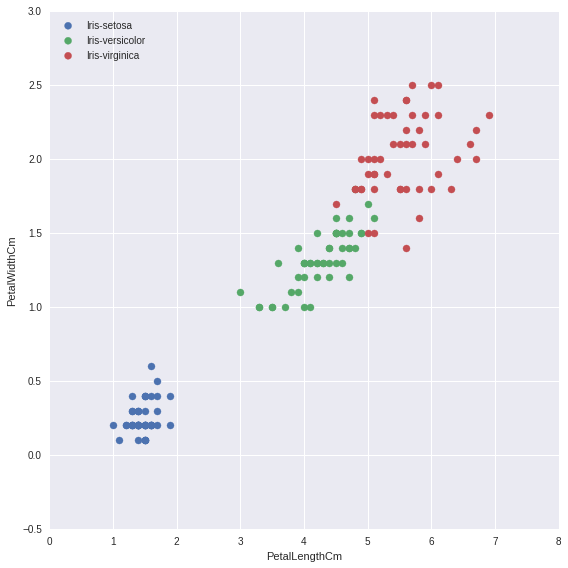

In [7]:
# Gráfico con respecto al pétalo de cada flor
petalPlt = sb.FacetGrid(data, hue="Species", size=8) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm", s = 50)
plt.legend(loc='upper left');

## Separación de los datos para entrenamiento y pruebas

In [8]:
# 80 % para entrenamiento y 20 % para pruebas
train = data.sample(frac = 0.8)
test = data.sample(frac = 0.2)

## Implementación del clasificador

In [9]:
# Las medias y las varianzas se calculan con el set de entrenamiento
means = train.groupby('Species').mean()
variances = train.groupby('Species').var()

# Calcula la media dado (caracteristica | clase)
def mean_x_y(x, y):
    return means[x][means.index == y].values[0]

# Calcula la varianza dado (caracteristica | clase)
def var_x_y(x, y):
    return variances[x][variances.index == y].values[0]

# Calculo de la función de probabilidad p(ejemplo | clase)
def p_x_y(x, var_y, mean_y):
    
    p = 1 / (np.sqrt(2 * np.pi * var_y)) * np.exp((-(x - mean_y) ** 2) / (2 * var_y))
    
    return p

# Calcula la probabilidad de que el ejemplo x pertenezca a la especie
def p_especie(x, especie):
    
    # Calculo de p(y)
    p = train.loc[train['Species'] == especie].shape[0] / train.shape[0]
    
    # p(y) * p(x_i | y)
    for c in ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']:
        p *= p_x_y(x[c], var_x_y(c,especie), mean_x_y(c, especie))
        
    return p 
    

## Clasificación y pruebas

In [10]:

from sklearn.metrics import classification_report, confusion_matrix

labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

test_size = test.values.shape[0]

pred = []
y_true = []

# Predicciones para los datos de prueba

for i in range(test_size):
    x = test.iloc[i]
    y_true.append(x['Species'])
    p = labels[np.argmax([p_especie(x, e) for e in labels])]
    pred.append(p)

# print('Accuracy : ', accuracy_score(y_true, pred))
print(classification_report(y_true, pred))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.86      1.00      0.92         6
 Iris-virginica       1.00      0.93      0.96        14

    avg / total       0.97      0.97      0.97        30



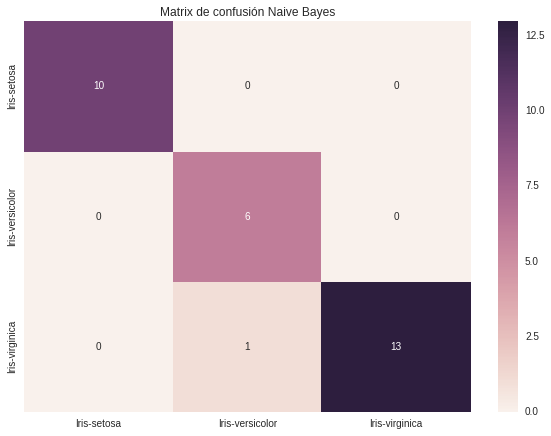

In [11]:
cfm = confusion_matrix(y_true, pred, labels = labels)
fig, ax = plt.subplots(figsize=(10,7)) 
sb.heatmap(cfm, annot = True, xticklabels = labels, yticklabels = labels, ax = ax);
plt.title('Matrix de confusión Naive Bayes');

![not-bad](./input/not-bad.jpg)